# Fitness Plan Analysis with Python & Machine Learning

I need to match the customer profile using age, height, weight, features and recommend their fitness plan to new custome. so let's get started

# Import Necessary Library

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import datetime
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

# Data Collections

In [184]:
data = pd.read_csv('data/Project_data.csv')
data.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,NaN,NaN,NaN,NaN,NaN,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,NaN,189.0,NaN,NaN,NaN,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


In [185]:
print(data.head())

   users_id  region gender  age  height  weight  deadlift  backsq  pullups  \
0     13576  Europe   Male   37     NaN     NaN       NaN     NaN      NaN   
1     47909  Europe   Male   44     NaN   189.0       NaN     NaN      NaN   
2     81192  Europe   Male   27    74.0   207.0     397.0   342.0     35.0   
3     15791  Europe   Male   33    74.0   203.0     463.0   331.0     20.0   
4     18543  Europe   Male   27    69.0   192.0     441.0   397.0     30.0   

                                   Goals WorkoutLocation Equipment  \
0  Lose fat and build strength & muscles            Home     None    
1  Lose fat and build strength & muscles            Home     None    
2  Lose fat and build strength & muscles            Home     None    
3  Lose fat and build strength & muscles            Home     None    
4  Lose fat and build strength & muscles            Home     None    

                              Program name  
0  Beginner home workout male (Bodyweight)  
1  Beginner home wor

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20011 entries, 0 to 20010
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   users_id         20011 non-null  int64  
 1   region           20011 non-null  object 
 2   gender           20011 non-null  object 
 3   age              20011 non-null  int64  
 4   height           9567 non-null   float64
 5   weight           16058 non-null  float64
 6   deadlift         7255 non-null   float64
 7   backsq           6924 non-null   float64
 8   pullups          3131 non-null   float64
 9   Goals            20011 non-null  object 
 10  WorkoutLocation  20011 non-null  object 
 11  Equipment        20011 non-null  object 
 12  Program name     20011 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 2.0+ MB


In [187]:
data.info

<bound method DataFrame.info of        users_id  region  gender  age  height  weight  deadlift  backsq  \
0         13576  Europe    Male   37     NaN     NaN       NaN     NaN   
1         47909  Europe    Male   44     NaN   189.0       NaN     NaN   
2         81192  Europe    Male   27    74.0   207.0     397.0   342.0   
3         15791  Europe    Male   33    74.0   203.0     463.0   331.0   
4         18543  Europe    Male   27    69.0   192.0     441.0   397.0   
...         ...     ...     ...  ...     ...     ...       ...     ...   
20006    470885  Europe  Female   29    68.0   194.0     331.0   245.0   
20007    514033  Europe  Female   18     NaN     NaN       NaN     NaN   
20008    499056  Europe  Female   21     NaN     NaN       NaN     NaN   
20009    557948  Europe  Female   30     NaN     NaN       NaN     NaN   
20010    628881  Europe  Female   20    64.0    61.0      80.0   143.0   

       pullups                                  Goals WorkoutLocation  \
0     

In [188]:
data.describe()

,users_id,age,height,weight,deadlift,backsq,pullups
count,20011.000000,20011.000000,9567.000000,16058.000000,7255.000000,6924.000000,3131.000000
mean,375252.074809,30.547999,68.379534,160.783597,330.972019,262.244512,28.692431
std,178627.189156,6.919060,11.237812,34.342032,168.836318,94.921906,28.037007
min,1695.000000,14.000000,0.000000,1.000000,0.000000,0.000000,-3.000000
25%,242614.500000,25.000000,66.000000,138.000000,254.000000,198.000000,15.000000
50%,434264.000000,29.000000,69.000000,161.000000,342.000000,265.000000,28.000000
75%,526707.500000,35.000000,71.000000,183.000000,408.000000,331.000000,40.000000
max,629633.000000,55.000000,720.000000,2000.000000,10000.000000,1111.000000,999.000000


In [189]:
data.describe

<bound method NDFrame.describe of        users_id  region  gender  age  height  weight  deadlift  backsq  \
0         13576  Europe    Male   37     NaN     NaN       NaN     NaN   
1         47909  Europe    Male   44     NaN   189.0       NaN     NaN   
2         81192  Europe    Male   27    74.0   207.0     397.0   342.0   
3         15791  Europe    Male   33    74.0   203.0     463.0   331.0   
4         18543  Europe    Male   27    69.0   192.0     441.0   397.0   
...         ...     ...     ...  ...     ...     ...       ...     ...   
20006    470885  Europe  Female   29    68.0   194.0     331.0   245.0   
20007    514033  Europe  Female   18     NaN     NaN       NaN     NaN   
20008    499056  Europe  Female   21     NaN     NaN       NaN     NaN   
20009    557948  Europe  Female   30     NaN     NaN       NaN     NaN   
20010    628881  Europe  Female   20    64.0    61.0      80.0   143.0   

       pullups                                  Goals WorkoutLocation  \
0   

In [190]:
data.columns

Index(['users_id', 'region', 'gender', 'age', 'height', 'weight', 'deadlift',
       'backsq', 'pullups', 'Goals', 'WorkoutLocation', 'Equipment',
       'Program name'],
      dtype='object')

# Data-Pre-Processing

Now let's check how many row & columns are there

In [191]:
data.shape

(20011, 13)

So there are row 20011 & 13 columns. before we go ahead, let’s see whether or not this dataset contains missing values or null values

In [192]:
data.isnull()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,False,False,False,False,True,True,True,True,True,False,False,False,False
1,False,False,False,False,True,False,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20006,False,False,False,False,False,False,False,False,False,False,False,False,False
20007,False,False,False,False,True,True,True,True,True,False,False,False,False
20008,False,False,False,False,True,True,True,True,True,False,False,False,False
20009,False,False,False,False,True,True,True,True,True,False,False,False,False


In [193]:
data.isnull().sum()

users_id               0
region                 0
gender                 0
age                    0
height             10444
weight              3953
deadlift           12756
backsq             13087
pullups            16880
Goals                  0
WorkoutLocation        0
Equipment              0
Program name           0
dtype: int64

As we can se there are some Null values lets check totall number of Null values are there

In [194]:
data.isnull().sum().sum()

57120

##### Lets filling this null values. we can fill the null vales many different ways lets have a look

fill by any numaric number like 0

In [195]:
df1 = data.fillna(value=0)

In [196]:
df1.isnull().sum()

users_id           0
region             0
gender             0
age                0
height             0
weight             0
deadlift           0
backsq             0
pullups            0
Goals              0
WorkoutLocation    0
Equipment          0
Program name       0
dtype: int64

Filling Null values with previous Values row ways

In [197]:
df2 = data.fillna(method="pad")
df2.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,NaN,NaN,NaN,NaN,NaN,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,NaN,189.0,NaN,NaN,NaN,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


Filling Null values with coming values or next Values row ways

In [198]:
df3 = data.fillna(method="bfill")
df3.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,74.0,189.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,74.0,189.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


Filling Null values with previous Values Columns ways

In [199]:
df4 = data.fillna(method="pad", axis=1)
df4.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,37,37,37,37,37,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,44,189.0,189.0,189.0,189.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


Filling Null values with coming values or next Values Columns ways

In [200]:
df5 = data.fillna(method="bfill", axis=1)
df5.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,Lose fat and build strength & muscles,Lose fat and build strength & muscles,Lose fat and build strength & muscles,Lose fat and build strength & muscles,Lose fat and build strength & muscles,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,189.0,189.0,Lose fat and build strength & muscles,Lose fat and build strength & muscles,Lose fat and build strength & muscles,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


Filling Null values with as you like whatever you wanna put on NAN individually

In [201]:
data.isnull().sum()

users_id               0
region                 0
gender                 0
age                    0
height             10444
weight              3953
deadlift           12756
backsq             13087
pullups            16880
Goals                  0
WorkoutLocation        0
Equipment              0
Program name           0
dtype: int64

In [202]:
df6 = data.fillna({"height": "0",
                    "weight": "1",
                    "deadlift": "0",
                    "backsq": "1",
                    "pullups": "0"})
    
df6.head()


,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,0,1,0,1,0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,0,189.0,0,1,0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


Filling Null values with the mean, max, min, count, std values

In [203]:
data.describe()

,users_id,age,height,weight,deadlift,backsq,pullups
count,20011.000000,20011.000000,9567.000000,16058.000000,7255.000000,6924.000000,3131.000000
mean,375252.074809,30.547999,68.379534,160.783597,330.972019,262.244512,28.692431
std,178627.189156,6.919060,11.237812,34.342032,168.836318,94.921906,28.037007
min,1695.000000,14.000000,0.000000,1.000000,0.000000,0.000000,-3.000000
25%,242614.500000,25.000000,66.000000,138.000000,254.000000,198.000000,15.000000
50%,434264.000000,29.000000,69.000000,161.000000,342.000000,265.000000,28.000000
75%,526707.500000,35.000000,71.000000,183.000000,408.000000,331.000000,40.000000
max,629633.000000,55.000000,720.000000,2000.000000,10000.000000,1111.000000,999.000000


In [204]:
df7 = data.fillna(value=data["height"].count())
df7 = data.fillna(value=data["height"].mean())
df7 = data.fillna(value=data["height"].std())
df7 = data.fillna(value=data["height"].min())
df7 = data.fillna(value=data["height"].max())
df7.head()


,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,720.0,720.0,720.0,720.0,720.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,720.0,189.0,720.0,720.0,720.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


# Dropna

Now drop rows by dropna function which is NAN

In [205]:
df8 = data.dropna()
df8.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
5,19548,Europe,Male,35,71.0,187.0,463.0,342.0,55.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
6,40474,Europe,Male,35,69.0,238.0,485.0,408.0,11.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


Filling Null values with "how" function

In [206]:
# you can use how="all" also 
df9 = data.dropna(how="any")
df9.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
5,19548,Europe,Male,35,71.0,187.0,463.0,342.0,55.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
6,40474,Europe,Male,35,69.0,238.0,485.0,408.0,11.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


# replace()

In [207]:
# to_replace=3.0, value=5.0 we can replace any of them
df10 = data.replace(to_replace=np.nan, value=875465)
df10.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,875465.0,875465.0,875465.0,875465.0,875465.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,875465.0,189.0,875465.0,875465.0,875465.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


# interpolate()

In [208]:
data["height"] = data["height"].interpolate(method="linear")
data.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,NaN,NaN,NaN,NaN,NaN,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,NaN,189.0,NaN,NaN,NaN,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


In [209]:
data["height"] = data["height"].interpolate(method="linear", limit_direction="forward")
data.head()

,users_id,region,gender,age,height,weight,deadlift,backsq,pullups,Goals,WorkoutLocation,Equipment,Program name
0,13576,Europe,Male,37,NaN,NaN,NaN,NaN,NaN,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
1,47909,Europe,Male,44,NaN,189.0,NaN,NaN,NaN,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
2,81192,Europe,Male,27,74.0,207.0,397.0,342.0,35.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
3,15791,Europe,Male,33,74.0,203.0,463.0,331.0,20.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)
4,18543,Europe,Male,27,69.0,192.0,441.0,397.0,30.0,Lose fat and build strength & muscles,Home,None,Beginner home workout male (Bodyweight)


# Here I will use df8 data for next step

In [210]:
df8.isnull().sum()

users_id           0
region             0
gender             0
age                0
height             0
weight             0
deadlift           0
backsq             0
pullups            0
Goals              0
WorkoutLocation    0
Equipment          0
Program name       0
dtype: int64

# Lets have a look the correlation

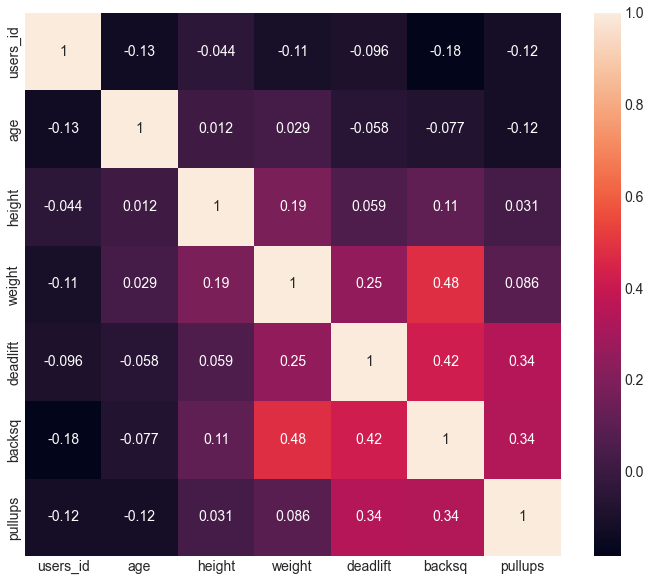

In [211]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(12, 10))
plt.rc("font", size=14)
sns.heatmap(df8.corr(), annot=True)
plt.show()

# Lets have a look how many Male & female are there

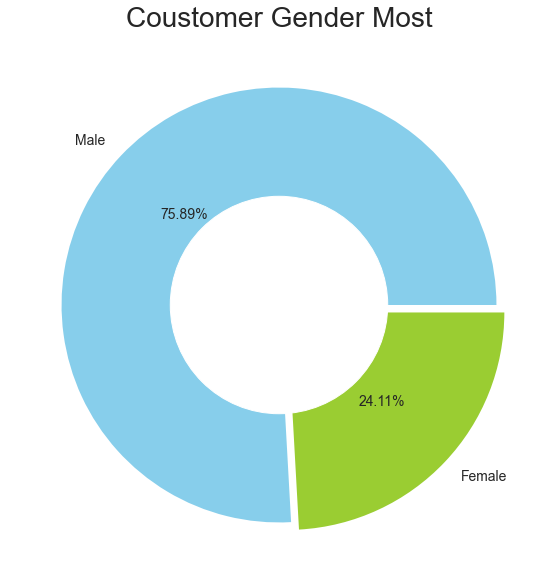

In [212]:
a = df8["gender"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", "tomato", "blue", "red"]
plt.figure(figsize=(10, 10))
plt.pie(sources, labels=index, colors=custom_colors, explode=(0, 0.05), autopct='%1.2f%%')
central_circle = plt.Circle((0, 0), 0.5, color="white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=18)
plt.title("Coustomer Gender Most", fontsize=28)
plt.show()


In [213]:
df8.isnull().sum()

users_id           0
region             0
gender             0
age                0
height             0
weight             0
deadlift           0
backsq             0
pullups            0
Goals              0
WorkoutLocation    0
Equipment          0
Program name       0
dtype: int64

# Maximum People in age

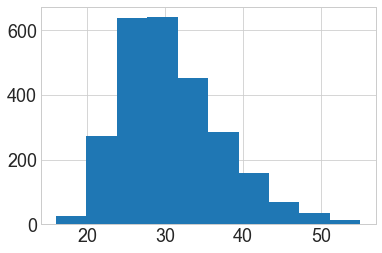

<Figure size 864x1152 with 0 Axes>

In [214]:
df8["age"].hist()
plt.figure(figsize=(12,16))
plt.show()

<AxesSubplot:xlabel='age', ylabel='users_id'>

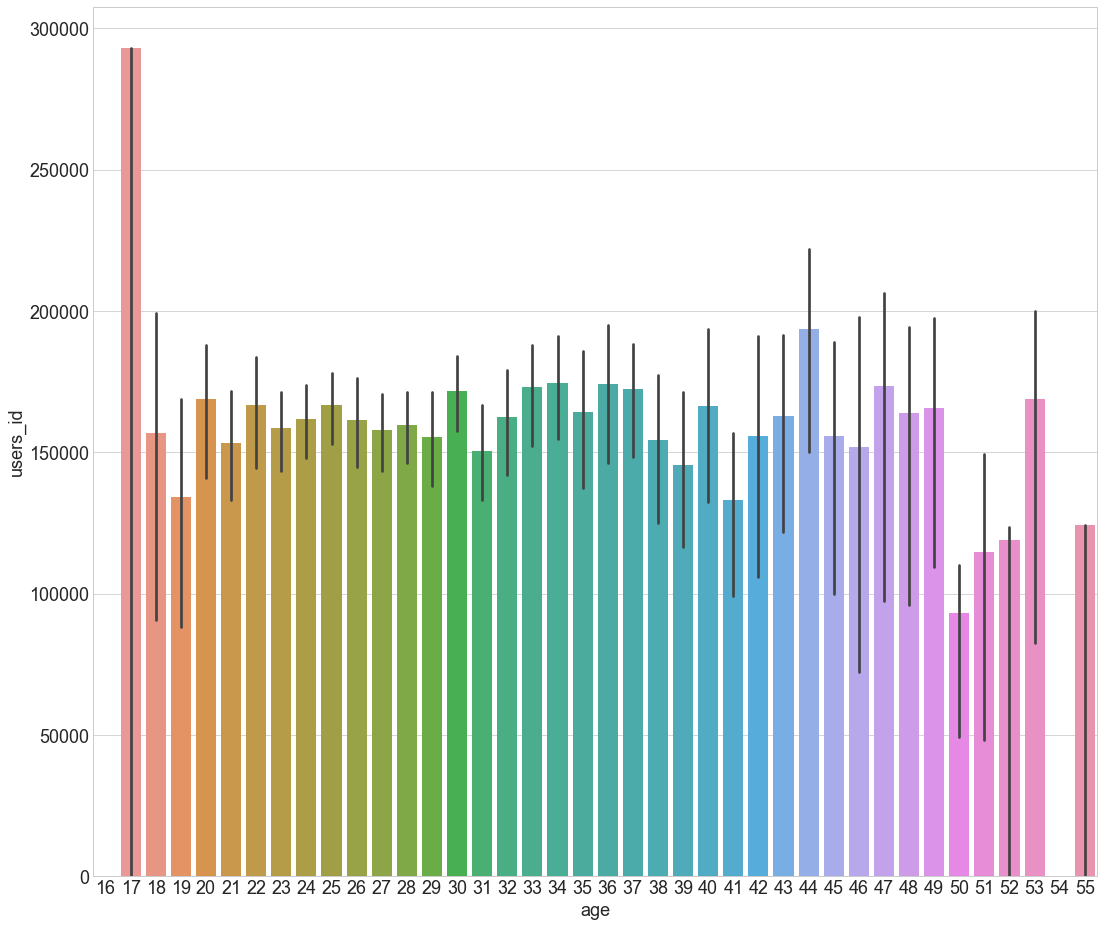

In [215]:
plt.figure(figsize=(18,16))
sns.barplot(x=('age'),y=('users_id'),data=df8, estimator=np.std)

# Maximum People in Height

<AxesSubplot:xlabel='height', ylabel='users_id'>

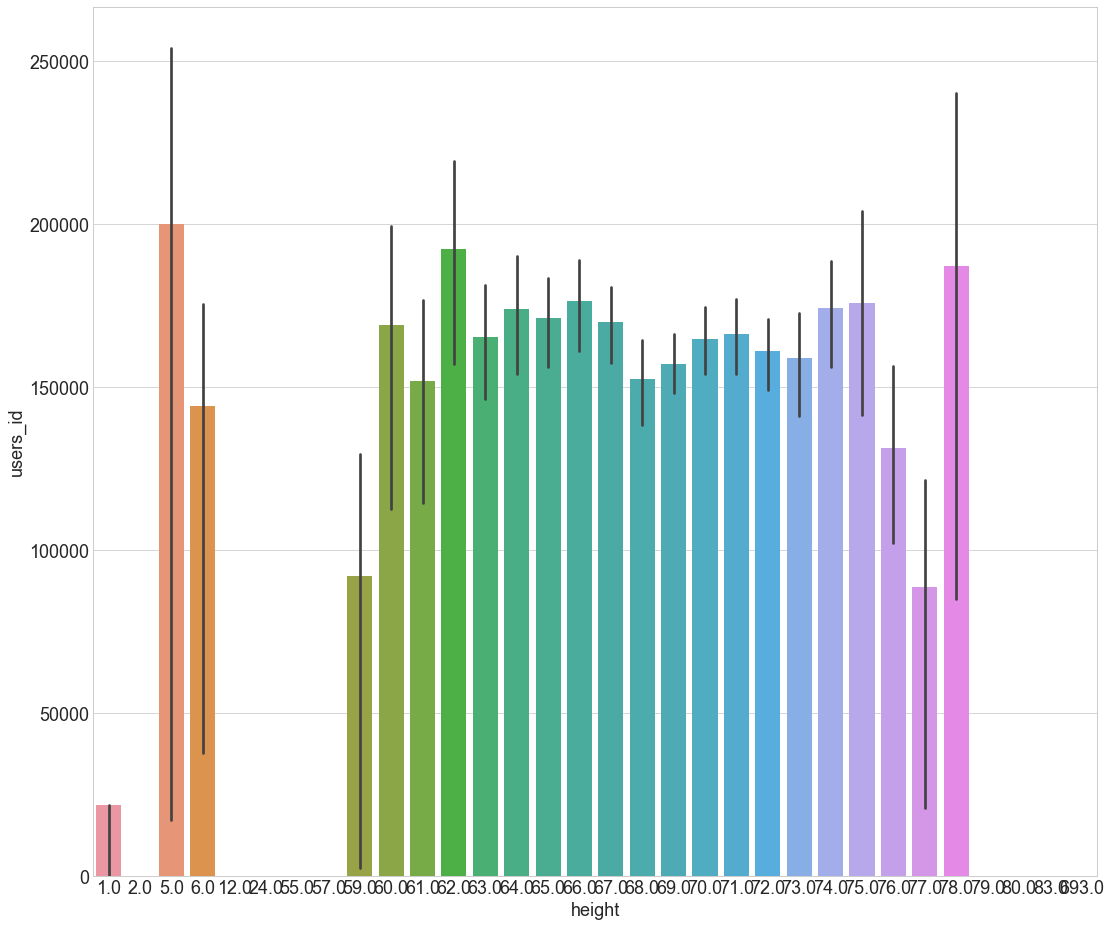

In [216]:
plt.figure(figsize=(18,16))
sns.barplot(x=('height'),y=('users_id'),data=df8, estimator=np.std)

# Maximum People in Weight

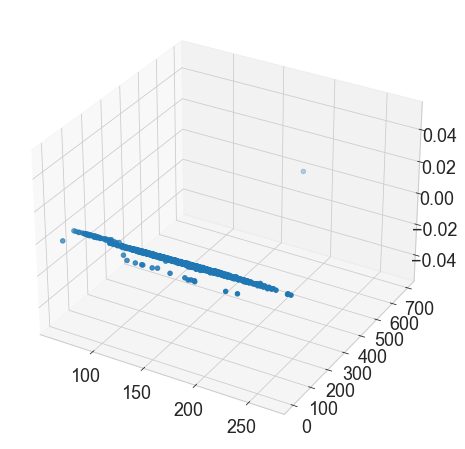

In [217]:
x = df9["weight"]
y = df9["height"]
z = df9["age"]
fig = plt.figure(figsize=(20, 8))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y)


In [218]:
df8.describe()

,users_id,age,height,weight,deadlift,backsq,pullups
count,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000
mean,213335.064330,30.663713,69.098998,170.372881,357.822804,280.927966,29.681048
std,165553.281497,6.590979,13.641961,29.572451,220.548223,96.400792,27.419849
min,1695.000000,16.000000,1.000000,62.000000,0.000000,0.000000,0.000000
25%,83710.500000,26.000000,67.000000,152.000000,287.000000,220.000000,18.000000
50%,174856.000000,30.000000,69.000000,175.000000,375.000000,287.000000,30.000000
75%,312786.250000,34.000000,72.000000,190.000000,441.000000,345.000000,40.000000
max,622395.000000,55.000000,693.000000,268.000000,10000.000000,1111.000000,999.000000


# Feature Selection

In [219]:
featute = df8[["age", "height", "weight", "deadlift", "backsq"]]
target = df8[["pullups"]]

# Spliting Data

In [220]:
from sklearn.model_selection import train_test_split
xtest, xtrain, ytest, ytrain = train_test_split(
    featute, target, test_size=0.2, random_state=42)


In [221]:
xtest.shape, xtrain.shape

((2076, 5), (520, 5))

In [222]:
ytest.shape, ytrain.shape

((2076, 1), (520, 1))

# Model Selection

In [223]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

# Model accuracy

In [224]:
accuracy = model.score(xtest, ytest)
print(accuracy)

0.11469667348981627


#  Summary

Forget about the accuracy, here I wanted to show you how different ways you can drop your NAN values. I hope you like this article. feel free to comment below if you have any better solutions.

# Sheikh Rasel Ahmed

#### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

###### LinkedIn - https://www.linkedin.com/in/shekhnirob1

###### GitHub - https://github.com/Rasel1435

###### Behance - https://www.behance.net/Shekhrasel2513